# Project 1: Classification Analysis on Textual Data

## Introduction

TBD

## Question 1: Getting familiar with the dataset
To get started, plot a histogram of the number of training documents for each of the 20 categories to check if they are evenly distributed.

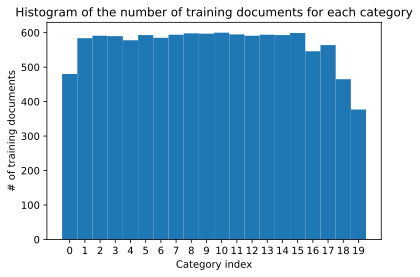

In [0]:
#Histogram of the number of training documents for each category

import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

newsgroups_train = fetch_20newsgroups(subset='train')

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(newsgroups_train.target,20)
ax1.set_xlabel('Category index')
ax1.set_ylabel('# of training documents')
ax1.set_title('Histogram of the number of training documents for each category')

h1 = np.linspace(0,19,21)
targets1=[]
for i in range(h1.shape[0]):
    if i!=0:
        targets1.append((h1[i-1]+h1[i])/2)
plt.xticks(targets1,range(20))

plt.show()

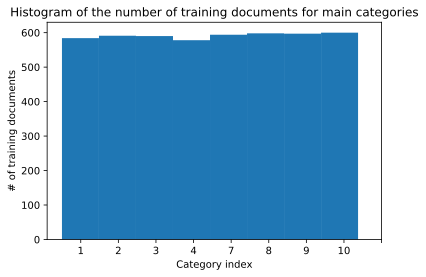

In [0]:
#Histogram of the number of training documents for categories we will mainly work on

from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.hist(fetch_20newsgroups(subset='train',categories=categories).target,8)
ax2.set_xlabel('Category index')
ax2.set_ylabel('# of training documents')
ax2.set_title('Histogram of the number of training documents for main categories')

h2 = np.linspace(0,8,10)
targets2=[]
for i in range(h2.shape[0]):
    if i!=0:
        targets2.append((h2[i-1]+h2[i])/2)
plt.xticks(targets2,(1,2,3,4,7,8,9,10))

plt.show()

## Question 2: Feature Extraction
Use the following specs to extract features from the textual data:

 • Use the “english” stopwords of the CountVectorizer  
 • Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)  
 • Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag  
 • Use min_df=3 

Report the shape of the TF-IDF matrices of the train and test subsets respectively.  

In [0]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

import nltk
from nltk import pos_tag
nltk.download('wordnet')
wnl = nltk.wordnet.WordNetLemmatizer()

nltk.download('averaged_perceptron_tagger')
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer(stop_words='english').build_analyzer()

import re

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not re.match(r'[\+\-]*\d',word))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(min_df=3, analyzer=stem_rmv_punc, stop_words='english')

X_train_counts = count_vect.fit_transform(train_dataset.data)
X_test_counts = count_vect.transform(test_dataset.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print('Shape of TF-IDf matrix')
print('Training dataset ',X_train_tfidf.shape)
print('Testing dataset: ',X_test_tfidf.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Shape of TF-IDf matrix
Training dataset  (4732, 15491)
Testing dataset:  (3150, 15491)


## Question 3: Dimensionality Reduction
Reduce the dimensionality of the data using LSI and NMF:

•Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each document is mapped to a 50-dimensional vector.  
•Also reduce dimnsionality through NMF (k = 50) and compare with LSI:  

Which one is larger, the $ \mid\mid X-WH\mid\mid_F^2 $ in NMF or the $\mid\mid X-U_k\sum_kV_k^T\mid\mid_F^2$ in LSI?  
Why is the case?


### Step 1: Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k=50

In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI = svd.transform(X_test_tfidf)
Vtranspose_LSI = svd.components_
print('LSI Reduced Matrix')
print('Shape of training dataset: ',X_train_LSI.shape)
print('Shape of testing dataset: ',X_test_LSI.shape)

LSI Reduced Matrix
Shape of training dataset:  (4732, 50)
Shape of testing dataset:  (3150, 50)


### Step 2: Apply NMF to the TF-IDF matrix corresponding to the 8 categories with k=50

In [0]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, init='random', random_state=42)
W_train_NMF = nmf.fit_transform(X_train_tfidf)
W_test_NMF = nmf.transform(X_test_tfidf)
H_NMF = nmf.components_
print('NMF Reduced Matrix')
print('Shape of W matrix in training dataset: ',W_train_NMF.shape)
print('Shape of W matrix in testing dataset: ',W_test_NMF.shape)
print('Shape of H matrix: ',H_NMF.shape)

NMF Reduced Matrix
Shape of W matrix in training dataset:  (4732, 50)
Shape of W matrix in testing dataset:  (3150, 50)
Shape of H matrix:  (50, 15491)


### Step 3: Compare  the $ \mid\mid X-WH\mid\mid_F^2 $ in NMF and the $\mid\mid X-U_k\sum_kV_k^T\mid\mid_F^2$ in LSI

In [0]:
print('Approximation Error')
print('NMF: ',np.sum(np.array(X_train_tfidf - W_train_NMF.dot(H_NMF))**2))
print('LSI: ',np.sum(np.array(X_train_tfidf - X_train_LSI.dot(Vtranspose_LSI))**2))

Approximation Error
NMF:  4142.468411670702
LSI:  4103.777081753964


## Question 4: Hard margin and soft margin linear SVMs:
• Train two linear SVMs and compare:  
&emsp;– Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin).  
&emsp;– Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall,
precision and F-1 score of both SVM classifier. Which one performs better?  
&emsp;– What happens for the soft margin SVM? Why is the case?  
&emsp;&emsp;∗ Does the ROC curve of the soft margin SVM look good? Does this conflict with other metrics?  
• Use cross-validation to choose γ (use average validation accuracy to compare):  
&emsp;Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10k|−3 ≤ k ≤ 3, k ∈ Z}. Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this best SVM.

In [0]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Step 1: Target Data Processing 

In [0]:
computer_classes = [0,1,2,3]
recreational_classes = [4,5,6,7]

train_target_binary = [1 if t in recreational_classes else 0 for t in train_dataset.target]
test_target_binary = [1 if t in recreational_classes else 0 for t in test_dataset.target]
train_target_binary = np.array(train_target_binary)
test_target_binary = np.array(test_target_binary)

In [0]:
print(train_target_binary[1:20])

[1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0]


In [0]:
print(test_target_binary[1:20])

[0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0]


### Step 2: Confusion Matrix Plot function & ROC Plot

In [0]:
def plot_cm(cm,title='Confusion matrix'):
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Computer Technology','Recreational Activity'], rotation=45)
    plt.yticks(tick_marks, ['Computer Technology','Recreational Activity'])

    width, height = cm.shape
    for x in range(width):
      for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [0]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)


In [0]:
def plot_parameter(prediction):
  print('Accuracy: ' + str(accuracy_score(test_target_binary.ravel(), prediction)))
  print('Precision: ' + str(precision_score(test_target_binary.ravel(), prediction)))
  print('Recall: ' + str(recall_score(test_target_binary.ravel(), prediction)))
  print('F-1 Score: ' + str(metrics.f1_score(test_target_binary.ravel(), prediction))) 

### Step 3: Training & Testing as Required

In [0]:
fprs = []
tprs = []

Accuracy: 0.9606349206349206
Precision: 0.9610062893081761
Recall: 0.9610062893081761
F-1 Score: 0.9610062893081761


<Figure size 432x288 with 0 Axes>

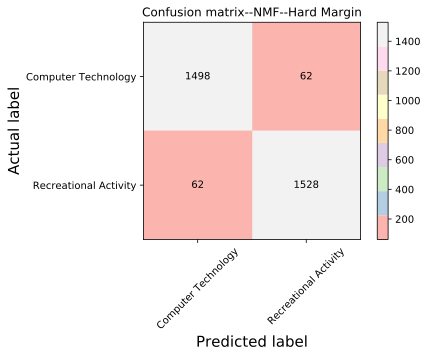

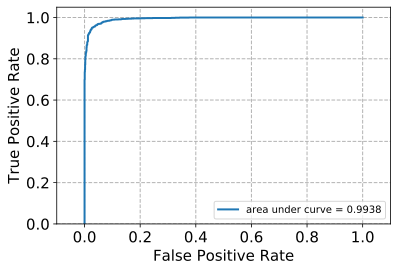

In [0]:
# SVC with NMF ---- Hard margin
plt.gcf().clear()
svm_nmf_hard = SVC(kernel='linear',C=1000)
svm_nmf_hard.fit(W_train_NMF,train_target_binary)
svm_nmf_predicted = svm_nmf_hard.predict(W_test_NMF)

plot_parameter(svm_nmf_predicted)
# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_nmf_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--NMF--Hard Margin')
# roc plot
fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_nmf_hard.decision_function(W_test_NMF),pos_label=1)
plot_roc(fpr, tpr)

Accuracy: 0.5047619047619047
Precision: 0.5047619047619047
Recall: 1.0
F-1 Score: 0.6708860759493671


<Figure size 432x288 with 0 Axes>

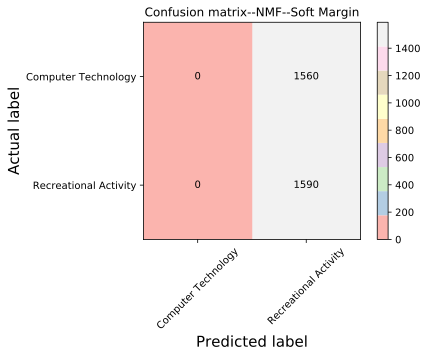

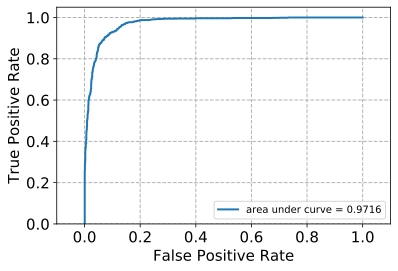

In [0]:
# SVC with NMF ---- Soft margin
plt.gcf().clear()
svm_nmf_soft = SVC(kernel='linear',C=0.0001)
svm_nmf_soft.fit(W_train_NMF,train_target_binary)
svm_nmf_predicted = svm_nmf_soft.predict(W_test_NMF)

plot_parameter(svm_nmf_predicted)

# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_nmf_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--NMF--Soft Margin')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_nmf_soft.decision_function(W_test_NMF),pos_label=1)
plot_roc(fpr, tpr)

Accuracy: 0.974920634920635
Precision: 0.9695463020509634
Recall: 0.9811320754716981
F-1 Score: 0.9753047827446076


<Figure size 432x288 with 0 Axes>

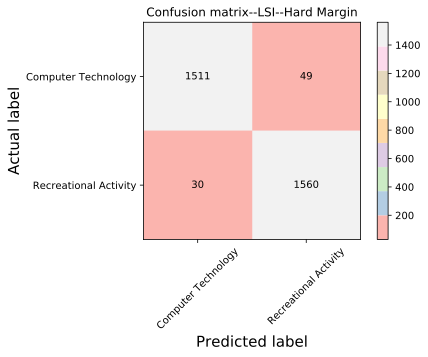

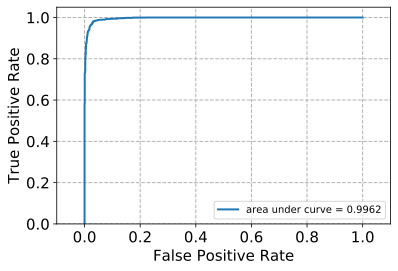

In [0]:
# SVC with LSI ---- Hard margin
plt.gcf().clear()
svm_lsi_hard = SVC(kernel='linear',C=1000)
svm_lsi_hard.fit(X_train_LSI,train_target_binary)
svm_lsi_predicted = svm_lsi_hard.predict(X_test_LSI)

plot_parameter(svm_lsi_predicted)

# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_lsi_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--LSI--Hard Margin')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_lsi_hard.decision_function(X_test_LSI),pos_label=1)
plot_roc(fpr, tpr)


# fpr, tpr = calculate_fpr_tpr(svc.decision_function(test_set), binary_test_target)
# return fpr, tpr

Accuracy: 0.5047619047619047
Precision: 0.5047619047619047
Recall: 1.0
F-1 Score: 0.6708860759493671


<Figure size 432x288 with 0 Axes>

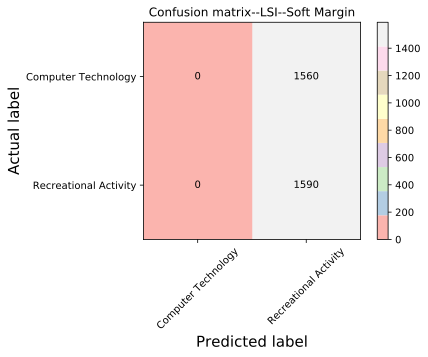

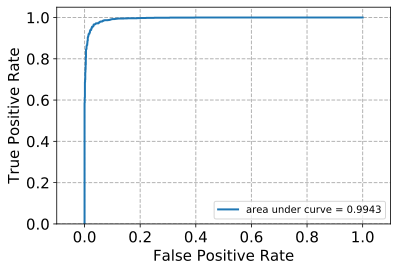

In [0]:
# SVC with LSI ---- Soft margin
plt.gcf().clear()
svm_lsi_soft = SVC(kernel='linear',C=0.0001)
svm_lsi_soft.fit(X_train_LSI,train_target_binary)
svm_lsi_predicted = svm_lsi_soft.predict(X_test_LSI)

plot_parameter(svm_lsi_predicted)

# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_lsi_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--LSI--Soft Margin')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_lsi_soft.decision_function(X_test_LSI))
plot_roc(fpr, tpr)


### Step 4: Cross Validation

In [0]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# gamma options:
tuned_parameters = [{'C': [10**-3]},
                    {'C': [10**-2]},
                    {'C': [10**-1]},
                    {'C': [10**0]},
                    {'C': [10**1]},
                    {'C': [10**2]},
                    {'C': [10**3]}]

In [0]:
# NMF
svm_nmf_cv = SVC(kernel='linear')
svm_nmf_cv_grid = GridSearchCV(svm_nmf_cv, tuned_parameters, cv=5)
svm_nmf_cv_grid.fit(W_train_NMF,train_target_binary)
pd.DataFrame(svm_nmf_cv_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.504861
1,0.01,0.504861
2,0.1,0.504861
3,1,0.951816
4,10,0.963017
5,100,0.967033
6,1000,0.969147


Accuracy: 0.9606349206349206
Precision: 0.9610062893081761
Recall: 0.9610062893081761
F-1 Score: 0.9610062893081761


<Figure size 432x288 with 0 Axes>

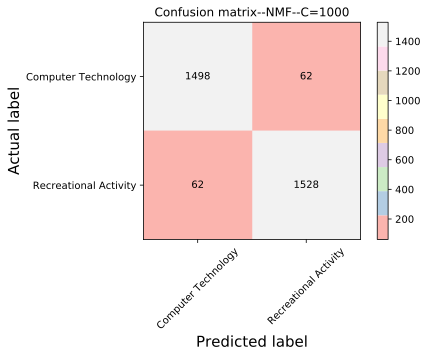

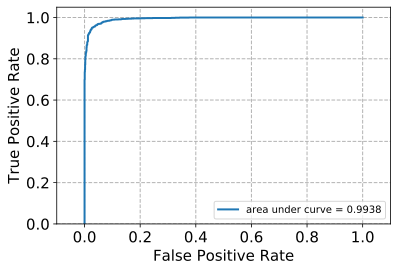

In [0]:
# With the best option gamma 1000
plt.gcf().clear()
svm_nmf = SVC(kernel='linear',C=1000)
svm_nmf.fit(W_train_NMF,train_target_binary)
svm_nmf_predicted = svm_nmf.predict(W_test_NMF)

plot_parameter(svm_nmf_predicted)

# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_nmf_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--NMF--C=1000')
# roc plot
fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_nmf.decision_function(W_test_NMF),pos_label=1)
plot_roc(fpr, tpr)

In [0]:
# LSI
svm_lsi_cv = SVC(kernel='linear')
svm_lsi_cv_grid = GridSearchCV(svm_lsi_cv, tuned_parameters, cv=5)
svm_lsi_cv_grid.fit(X_train_LSI,train_target_binary)
pd.DataFrame(svm_lsi_cv_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.504861
1,0.01,0.505283
2,0.1,0.968300
3,1,0.971681
4,10,0.973795
5,100,0.973162
6,1000,0.974217


Accuracy: 0.974920634920635
Precision: 0.9695463020509634
Recall: 0.9811320754716981
F-1 Score: 0.9753047827446076


<Figure size 432x288 with 0 Axes>

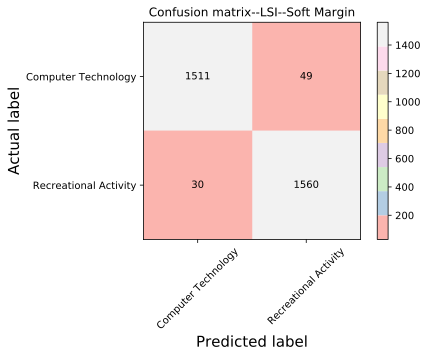

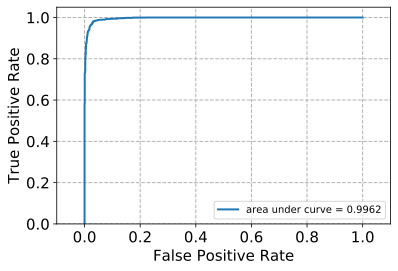

In [0]:
# With the best option gamma 1000
plt.gcf().clear()
svm_lsi = SVC(kernel='linear',C=1000)
svm_lsi.fit(X_train_LSI,train_target_binary)
svm_lsi_predicted = svm_lsi.predict(X_test_LSI)
plot_parameter(svm_lsi_predicted)

# confusion matrix
cm = metrics.confusion_matrix(test_target_binary, svm_lsi_predicted)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--LSI--Soft Margin')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,svm_lsi.decision_function(X_test_LSI))
plot_roc(fpr, tpr)


## Question 5: Logistic classifier:  (Using LSI for now)
• Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this classifier.


• Regularization:
– Using 5-fold cross-validation on the dimension-reduced-by-svd training data, find the best regularization strength in the range {$10^k$ | − 3 ≤ k ≤ 3, k ∈ Z} for logistic regression with L1 regularization and logistic regression L2 regularization, respectively.
– Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classi- fiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.
– How does the regularization parameter affect the test error? How are the learnt coeffi- cients affected? Why might one be interested in each type of regularization?
– Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary? Why their performance differ?


### Step 1: Logistic model without regularization

C: float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
-> To realize 'without regularization'   set C be extrmely large.

----------Logistic Model without Regularization----------
Accuracy: 0.9720634920634921
Precision: 0.9664596273291925
Recall: 0.9786163522012579
F-1 Score: 0.9724999999999999


<Figure size 432x288 with 0 Axes>

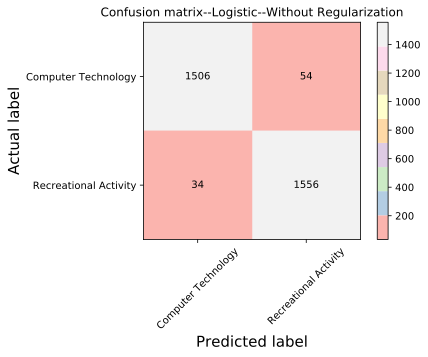

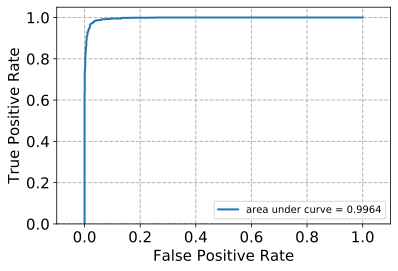

In [0]:
from sklearn.linear_model import LogisticRegression
logistic_wo = LogisticRegression(penalty = 'none',max_iter = 100)
logistic_wo.fit(X_train_LSI,train_target_binary)
logistic_wo_pred = logistic_wo.predict(X_test_LSI)
print('-'*10 + 'Logistic Model without Regularization'+ '-'*10)

plot_parameter(logistic_wo_pred)

# confusion matrix
plt.gcf().clear()
cm = metrics.confusion_matrix(test_target_binary, logistic_wo_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--Logistic--Without Regularization')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,logistic_wo.decision_function(X_test_LSI))
plot_roc(fpr, tpr)


### Step 2: Logistic Model with L1 regularization

In [0]:
tuned_parameters_log = [{'C': [10**-3]},
                    {'C': [10**-2]},
                    {'C': [10**-1]},
                    {'C': [10**0]},
                    {'C': [10**1]},
                    {'C': [10**2]},
                    {'C': [10**3]}]
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
logistic_L1 = LogisticRegression(penalty='l1',solver='liblinear')
logistic_L1_grid = GridSearchCV(logistic_L1, parameters,cv=5)
logistic_L1_grid.fit(X_train_LSI,train_target_binary)
pd.DataFrame(logistic_L1_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.495139
1,0.01,0.896452
2,0.1,0.962173
3,1,0.969569
4,10,0.975274
5,100,0.975486
6,1000,0.975275


----------Logistic Model with L1 Regularization C=100----------
Accuracy: 0.9720634920634921
Precision: 0.9664596273291925
Recall: 0.9786163522012579
F-1 Score: 0.9724999999999999
Coefficient Statistics: 
mean = 4.413238, std = 23.704741


<Figure size 432x288 with 0 Axes>

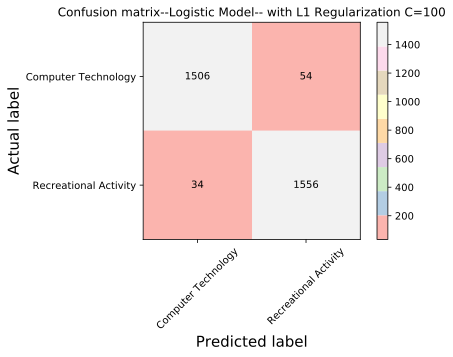

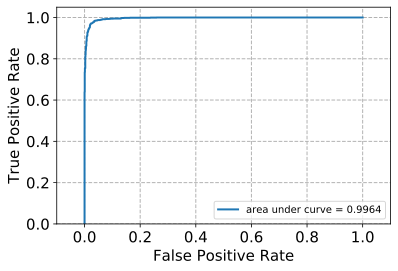

In [0]:
# select C = 1000 as the best option
logistic_l1 = LogisticRegression(C=100,penalty='l1',solver='liblinear')
logistic_l1.fit(X_train_LSI,train_target_binary)
logistic_l1_pred = logistic_l1.predict(X_test_LSI)
print('-'*10 + 'Logistic Model with L1 Regularization C=100'+ '-'*10)
plot_parameter(logistic_l1_pred)
print("Coefficient Statistics: ")
print("mean = %f, std = %f" % (np.mean(logistic_l1.coef_), np.std(logistic_l1.coef_)))

# confusion matrix
plt.gcf().clear()
cm = metrics.confusion_matrix(test_target_binary, logistic_l1_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--Logistic Model-- with L1 Regularization C=100')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,logistic_l1.decision_function(X_test_LSI))
plot_roc(fpr, tpr)

### Step 3: Logistic Model with L2 regularization

In [0]:
logistic_L2 = LogisticRegression(penalty='l2',max_iter = 200)
logistic_L2_grid = GridSearchCV(logistic_L2, tuned_parameters,cv=5)
logistic_L2_grid.fit(X_train_LSI,train_target_binary)
pd.DataFrame(logistic_L2_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.521344
1,0.01,0.944209
2,0.1,0.969358
3,1,0.972949
4,10,0.973583
5,100,0.974640
6,1000,0.975486


----------Logistic Model with L2 Regularization C=1000----------
Accuracy: 0.9720634920634921
Precision: 0.9664596273291925
Recall: 0.9786163522012579
F-1 Score: 0.9724999999999999
Coefficient Statistics: 
mean = 4.129433, std = 22.179124


<Figure size 432x288 with 0 Axes>

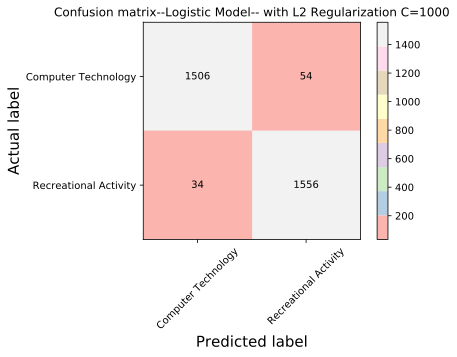

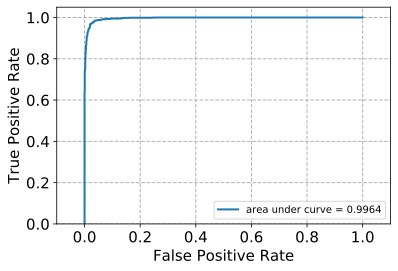

In [0]:
# select C = 1000 as the best option
logistic_l2 = LogisticRegression(C=1000,penalty='l2')
logistic_l2.fit(X_train_LSI,train_target_binary)
logistic_l2_pred = logistic_l1.predict(X_test_LSI)
print('-'*10 + 'Logistic Model with L2 Regularization C=1000'+ '-'*10)
plot_parameter(logistic_l2_pred)
print("Coefficient Statistics: ")
print("mean = %f, std = %f" % (np.mean(logistic_l2.coef_), np.std(logistic_l2.coef_)))

# confusion matrix
plt.gcf().clear()
cm = metrics.confusion_matrix(test_target_binary, logistic_l2_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--Logistic Model-- with L2 Regularization C=1000')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,logistic_l2.decision_function(X_test_LSI))
plot_roc(fpr, tpr)

## Question 6: Naive Bayes Classifier
Naive Bayes classifier: train a GaussianNB classifier; plot the ROC curve and
report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of this
classifier.

----------Naive Bayes Classifier----------
Accuracy: 0.8987301587301587
Precision: 0.8548297040759353
Recall: 0.9628930817610063
F-1 Score: 0.9056492162082225


<Figure size 432x288 with 0 Axes>

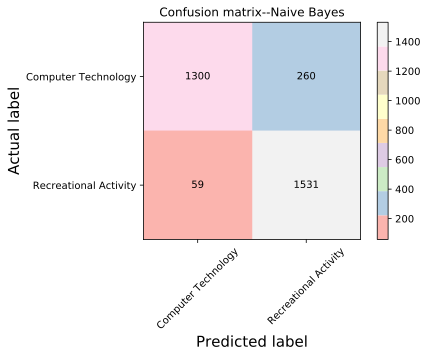

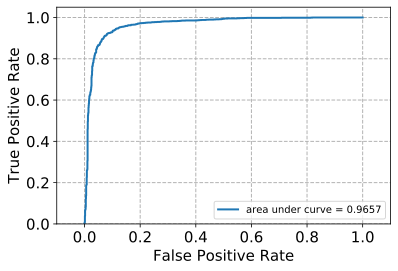

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_LSI,train_target_binary)
nb_pred = nb.predict(X_test_LSI)
print('-'*10 + 'Naive Bayes Classifier'+ '-'*10)
plot_parameter(nb_pred)

# confusion matrix
plt.gcf().clear()
cm = metrics.confusion_matrix(test_target_binary, nb_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_cm(cm,title='Confusion matrix--Naive Bayes')

fpr, tpr, thresholds = metrics.roc_curve(test_target_binary,nb.predict_proba(X_test_LSI)[:,1])
plot_roc(fpr, tpr)

##Question 7: Grid search of parameters

### Step1: Construct a pipeline and a search grid

In [0]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', None),
    ('clf', None),
])
param_grid = [
    {
        'vect__min_df': [3, 5],
        'vect__analyzer': [stem_rmv_punc, 'word'],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42), NMF(n_components=50, init='random', random_state=42)],
        'clf': [SVC(kernel='linear',C=1000),LogisticRegression(C=1000,penalty='l1',solver='liblinear'), LogisticRegression(C=1000,penalty='l2'),GaussianNB()],
    },
]
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=param_grid, scoring='accuracy')

### Step 2: Test on data with header & footer

In [0]:
grid.fit(train_dataset.data, train_target_binary)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [0]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect__analyzer,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,79.587601,1.857778,19.269910,1.059861,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7f76b73838c8>,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.969377,0.976769,0.975687,0.969345,0.972516,0.972739,0.003092,11
1,78.438087,1.111367,19.322535,1.039187,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7f76b73838c8>,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.967265,0.975713,0.973573,0.970402,0.973573,0.972105,0.002955,13
2,3.062709,0.074070,0.351402,0.032533,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",word,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.972545,0.977825,0.977801,0.971459,0.978858,0.975698,0.003061,1
3,2.821001,0.079340,0.327996,0.011949,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",word,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.972545,0.978881,0.973573,0.973573,0.977801,0.975275,0.002555,2
4,102.938291,5.464141,19.248966,1.057281,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7f76b73838c8>,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.969377,0.970433,0.971459,0.965116,0.984144,0.972106,0.006394,12
5,95.313172,4.442257,19.082350,1.119773,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7f76b73838c8>,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.965153,0.971489,0.966173,0.959831,0.973573,0.967244,0.004869,22
6,39.473086,3.789861,0.518108,0.019771,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",word,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.961985,0.966209,0.967230,0.968288,0.976744,0.968091,0.004827,17
7,25.426835,5.129433,0.501537,0.032996,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",word,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.961985,0.968321,0.967230,0.964059,0.970402,0.966400,0.003012,23
8,77.965489,1.004507,19.302473,1.083752,"LogisticRegression(C=1000, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7f76b73838c8>,3,"{'clf': LogisticRegression(C=1000, class_weigh...",0.970433,0.974657,0.973573,0.969345,0.978858,0.973373,0.003366,6
9,77.797689,1.169897,19.214625,1.045361,"LogisticRegression(C=1000, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7f76b73838c8>,5,"{'clf': LogisticRegression(C=1000, class_weigh...",0.971489,0.975713,0.971459,0.970402,0.976744,0.973161,0.002556,10


### Step 3: Test on data without header & footer

In [0]:
train_dataset_stripped = fetch_20newsgroups(
    subset = 'train', categories = categories, shuffle = True, random_state = None, remove=('headers','footers'))
train_stripped_target_binary = [1 if t in recreational_classes else 0 for t in train_dataset_stripped.target]

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', None),
    ('clf', None),
])
param_grid = [
    {
        'vect__min_df': [3, 5],
        'vect__analyzer': [stem_rmv_punc, 'word'],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42), NMF(n_components=50, init='random', random_state=42)],
        'clf': [SVC(kernel='linear',C=1000),LogisticRegression(C=1000,penalty='l1',solver='liblinear'), LogisticRegression(C=1000,penalty='l2'),GaussianNB()],
    },
]
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=param_grid, scoring='accuracy')

In [0]:
grid.fit(train_dataset_stripped.data, train_stripped_target_binary)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [0]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect__analyzer,param_vect__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,62.125235,1.805338,15.285538,1.748459,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7ff9e30d79d8>,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.973601,0.976769,0.976744,0.953488,0.968288,0.969778,0.008713,8
1,62.049223,1.823145,15.247497,1.772975,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7ff9e30d79d8>,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.969377,0.976769,0.974630,0.953488,0.965116,0.967876,0.008265,15
2,2.349638,0.060487,0.275787,0.025251,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",word,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.974657,0.985216,0.974630,0.966173,0.969345,0.974004,0.006474,2
3,2.184096,0.096658,0.272223,0.021229,"SVC(C=1000, break_ties=False, cache_size=200, ...","TruncatedSVD(algorithm='randomized', n_compone...",word,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.974657,0.982049,0.971459,0.964059,0.968288,0.972102,0.006085,6
4,81.573921,2.149171,15.243771,1.938982,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7ff9e30d79d8>,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.961985,0.974657,0.970402,0.952431,0.955603,0.963016,0.008463,22
5,78.539452,2.369456,14.999964,1.658617,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7ff9e30d79d8>,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.957761,0.975713,0.973573,0.957717,0.954545,0.963862,0.008905,20
6,28.066732,3.068609,0.398919,0.027591,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",word,3,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.965153,0.978881,0.976744,0.961945,0.959831,0.968511,0.007811,12
7,18.706973,3.479596,0.376780,0.021655,"SVC(C=1000, break_ties=False, cache_size=200, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",word,5,"{'clf': SVC(C=1000, break_ties=False, cache_si...",0.969377,0.975713,0.973573,0.966173,0.965116,0.969990,0.004106,7
8,61.776516,1.836087,15.194385,1.834124,"LogisticRegression(C=1000, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7ff9e30d79d8>,3,"{'clf': LogisticRegression(C=1000, class_weigh...",0.974657,0.975713,0.976744,0.953488,0.965116,0.969144,0.008861,10
9,61.463138,1.772666,15.221579,1.741214,"LogisticRegression(C=1000, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7ff9e30d79d8>,5,"{'clf': LogisticRegression(C=1000, class_weigh...",0.974657,0.975713,0.974630,0.953488,0.963002,0.968298,0.008751,14


## Question 8 :Multiclass classification

### Step1: Loading data and extract features

In [0]:
# Load the specific 4 categories
from sklearn.datasets import fetch_20newsgroups
categories_mult = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
train_mult = fetch_20newsgroups(subset = 'train',categories = categories_mult,shuffle = True,random_state = 42)
test_mult = fetch_20newsgroups(subset = 'test',categories = categories_mult,shuffle = True,random_state = 42)

# Transform dataset into tfidf matrices
train_mult_count = count_vect.fit_transform(train_mult.data)
test_mult_count = count_vect.transform(test_mult.data)
tfidf_transformer = TfidfTransformer()
train_mult_TFIDF = tfidf_transformer.fit_transform(train_mult_count)
test_mult_TFIDF = tfidf_transformer.transform(test_mult_count)

# Use LSI and DMF to do the dimension reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
svd = TruncatedSVD(n_components = 50,random_state = 42)
train_mult_LSI = svd.fit_transform(train_mult_TFIDF)
test_mult_LSI = svd.transform(test_mult_TFIDF)
nmf = NMF(n_components = 50, init = 'random', random_state = 42)
W_train_mult = nmf.fit_transform(train_mult_TFIDF)
W_test_mult = nmf.transform(test_mult_TFIDF)
H_mult = nmf.components_

# Print the shape of all matrices
print('Shape of TFIDF of trainset: ',train_mult_TFIDF.shape)
print('Shape of TFIDF of testset: ',test_mult_TFIDF.shape)
print('Shape of LSI reduction of trainset: ',train_mult_LSI.shape)
print('Shape of LSI reduction of testset: ',test_mult_LSI.shape)
print('Shape of NMF reduction martix W of trainset: ',W_train_mult.shape)
print('Shape of NMF reduction matrix W of testset: ',W_test_mult.shape)
print('Shape of NMF reduction matrix H: ',H_mult.shape)

Shape of TFIDF of trainset:  (2352, 8285)
Shape of TFIDF of testset:  (1565, 8285)
Shape of LSI reduction of trainset:  (2352, 50)
Shape of LSI reduction of testset:  (1565, 50)
Shape of NMF reduction martix W of trainset:  (2352, 50)
Shape of NMF reduction matrix W of testset:  (1565, 50)
Shape of NMF reduction matrix H:  (50, 8285)


In [0]:
def print_performance(target,prediction,title):
  from sklearn import metrics
  print('Accuracy: ' + str(metrics.accuracy_score(target, prediction)))
  print('Precision: ' + str(metrics.precision_score(target, prediction, average = 'macro')))
  print('Recall: ' + str(metrics.recall_score(target, prediction, average = 'macro')))
  print('F-1 Score: ' + str(metrics.f1_score(target, prediction, average = 'macro')))
  cm = metrics.confusion_matrix(target,prediction)
  plot_cm_mult(cm,title)

In [0]:
def plot_cm_mult(cm,title):
    import matplotlib.pyplot as plt
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian'],rotation = 45)
    plt.yticks(tick_marks, ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian'])

    width, height = cm.shape
    for x in range(width):
      for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [0]:
# Relabel the 4 categories
import numpy as np
train_mult_label = [t for t in train_mult.target]
test_mult_label = [t for t in test_mult.target]
train_mult_target = np.array(train_mult_label)
test_mult_target = np.array(test_mult_label)

### Step2: Naive Bayes Classification

Accuracy: 0.7789137380191693
Precision: 0.7873651384009908
Recall: 0.7772437959264951
F-1 Score: 0.7756494364548651


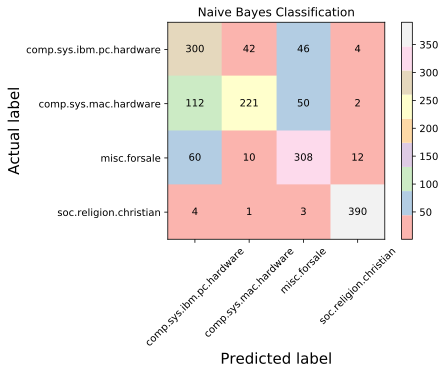

In [0]:
# Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
NB_mult = MultinomialNB().fit(W_train_mult, train_mult.target)
NB_prediction = NB_mult.predict(W_test_mult)

# Print performance
print_performance(test_mult_target,NB_prediction,'Naive Bayes Classification')

### Step3: SVM Classification one-to-one

Accuracy: 0.8402555910543131
Precision: 0.8422795878845704
Recall: 0.8394125855001662
F-1 Score: 0.8404116468707852


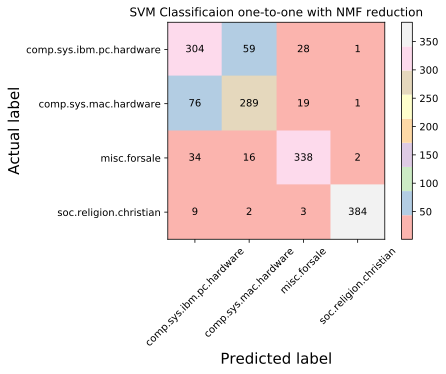

In [0]:
# SVM Classification with One-to-One method of NMF reduction
from sklearn.svm import SVC
SVM_mult = SVC(kernel = 'linear', C = 250)
SVM_mult.fit(W_train_mult, train_mult.target)
SVM_prediction_NMF = SVM_mult.predict(W_test_mult)

# Print performance
print_performance(test_mult_target,SVM_prediction_NMF,'SVM Classificaion one-to-one with NMF reduction')

Accuracy: 0.8830670926517572
Precision: 0.8828005277518514
Recall: 0.8825169939536415
F-1 Score: 0.8826204016344885


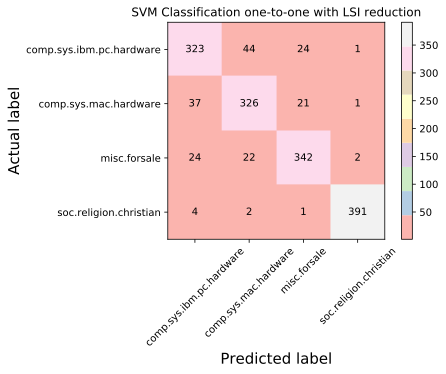

In [0]:
# SVM Classification with One-to-One method of LSI reduction
SVM_mult = SVC(kernel = 'linear', C = 250)
SVM_mult.fit(train_mult_LSI, train_mult.target)
SVM_prediction_LSI = SVM_mult.predict(test_mult_LSI)

#Print_performance
print_performance(test_mult_target,SVM_prediction_LSI,'SVM Classification one-to-one with LSI reduction')

### Step4: SVM Classification one-to-rest

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8396166134185303
Precision: 0.8378459641079623
Recall: 0.8387952395176013
F-1 Score: 0.8381956299031968


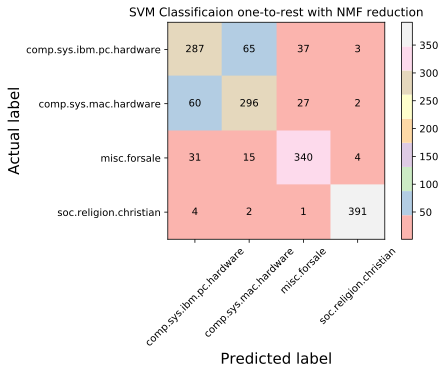

In [0]:
# SVM Classification with One-to-rest method of NMF reduction
from sklearn.svm import LinearSVC
SVM_mult = LinearSVC(C = 100)
SVM_mult.fit(W_train_mult, train_mult.target)
SVM_prediction_NMF = SVM_mult.predict(W_test_mult)

# Print performance
print_performance(test_mult_target,SVM_prediction_NMF,'SVM Classificaion one-to-rest with NMF reduction')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8843450479233227
Precision: 0.8838439326195104
Recall: 0.8838257040877284
F-1 Score: 0.8836688131116188


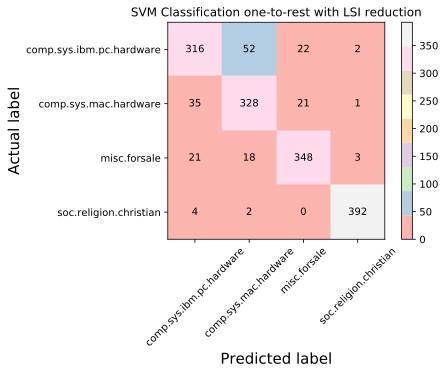

In [0]:
# SVM Classification with One-to-Rest method of LSI reduction
SVM_mult = LinearSVC(C = 100)
SVM_mult.fit(train_mult_LSI, train_mult.target)
SVM_prediction_LSI = SVM_mult.predict(test_mult_LSI)

#Print_performance
print_performance(test_mult_target,SVM_prediction_LSI,'SVM Classification one-to-rest with LSI reduction')